<a href="https://colab.research.google.com/github/raghav2069/Stock-market-prediction-using-CNN/blob/main/CreditCard_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Vsekar05/UCL_Credit_Default_Prediction/main/Cleaned_Data.csv', index_col=0)
print(df.shape)
df.sample(10)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6024,6025,210000,2,2,2,29,1,1,0,0,...,-1987,1697,4347,0,0,2000,4000,3000,5000,0
26126,26127,60000,2,2,2,35,0,0,0,0,...,16453,4131,4006,1400,1024,16469,131,322,40000,0
4810,4811,300000,2,1,2,31,0,0,0,0,...,10288,12565,6947,5000,5045,10288,5000,5000,10000,0
9208,9209,20000,2,2,1,41,0,0,0,0,...,9438,5700,1140,1300,3000,189,0,1140,390,0
12014,12015,80000,1,1,2,37,0,0,0,0,...,71534,73344,75218,3000,3310,2200,2400,2500,2400,0
2977,2978,300000,1,1,2,25,0,0,0,0,...,19507,18169,18533,4103,1427,600,1200,2500,18000,0
17224,17225,20000,2,2,2,22,0,0,0,2,...,15133,15582,16677,1515,5000,0,1000,1500,0,0
17495,17496,50000,2,2,1,32,0,0,0,0,...,8337,2475,0,1500,1847,1000,0,0,0,0
24734,24735,400000,1,1,1,47,0,0,0,0,...,112444,97523,84858,3904,5646,5000,3000,5000,5000,0
26714,26715,20000,1,1,2,28,0,0,0,0,...,18302,18995,19400,1310,3190,1500,1000,860,900,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

The dataset has already been cleaned and all negative values from PAY columns have been converted to 0, as advance payment is considerd as 'duly paid'

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['ID','default.payment.next.month'], axis='columns'), df['default.payment.next.month'], test_size=0.2, random_state=10)

In [6]:
from sklearn.svm import SVC
model_svm=SVC().fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.7805

In [7]:
import xgboost as xgb
model=xgb.XGBClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.8251666666666667

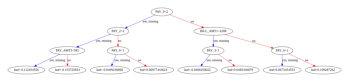

In [8]:
xgb.plot_tree(model)
plt.show()

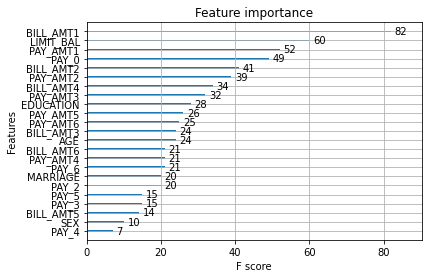

In [9]:
xgb.plot_importance(model)

In [10]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
df_processed_pca=pd.DataFrame(pca.fit_transform(df.drop(['ID','default.payment.next.month'], axis='columns')))
df_processed_pca.shape

(30000, 4)

In [11]:
pca.n_components_

4

In [12]:
pca.explained_variance_ratio_

array([0.61043701, 0.29535381, 0.03052419, 0.01692859])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_processed_pca, df['default.payment.next.month'], test_size=0.2, random_state=10)

In [14]:
from xgboost import XGBClassifier
model_pca=XGBClassifier().fit(X_train, y_train)
model_pca.score(X_test, y_test)

0.782